In [1]:
#The Libararies Used
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import dataset
data_path = r'C:\Users\UAE\Downloads\Abdur Rafay\Datasets\KNNAlgorithmDataset.csv'
df_new = pd.read_csv(data_path)

print("Shape of the new dataset:", df_new.shape)
print("\nFirst 5 rows of the new dataset:")
print(df_new.head())

Shape of the new dataset: (569, 33)

First 5 rows of the new dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10

In [2]:
# DataSet Summary & checking 
print("\nSummary of the new dataset:")
df_new.info()

# Check for missing values
print("\nMissing values in the new dataset:")
print(df_new.isnull().sum())

# Frequency distribution of the target variable
print("\nFrequency distribution of the target variable (diagnosis):")
print(df_new['diagnosis'].value_counts())
print("\nPercentage frequency distribution of the target variable (diagnosis):")
print(df_new['diagnosis'].value_counts() / len(df_new))


Summary of the new dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 1

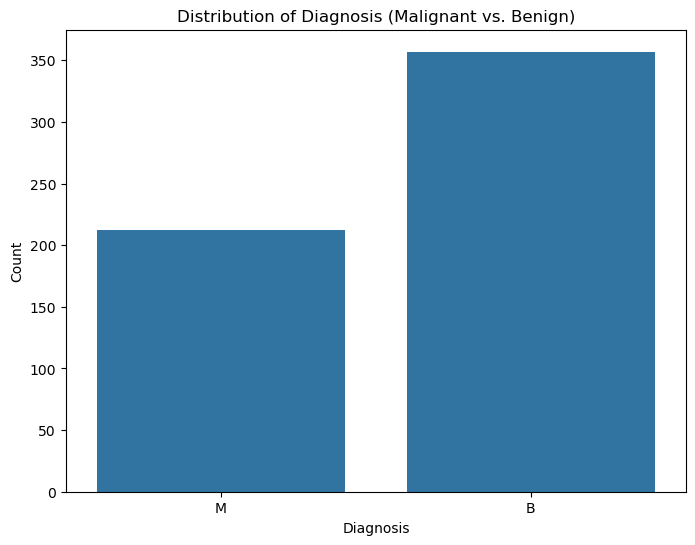

In [3]:
# Bar Plot to show the number of occurrences of each category 
plt.figure(figsize=(8, 6))
sns.countplot(data=df_new, x='diagnosis')
plt.title('Distribution of Diagnosis (Malignant vs. Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

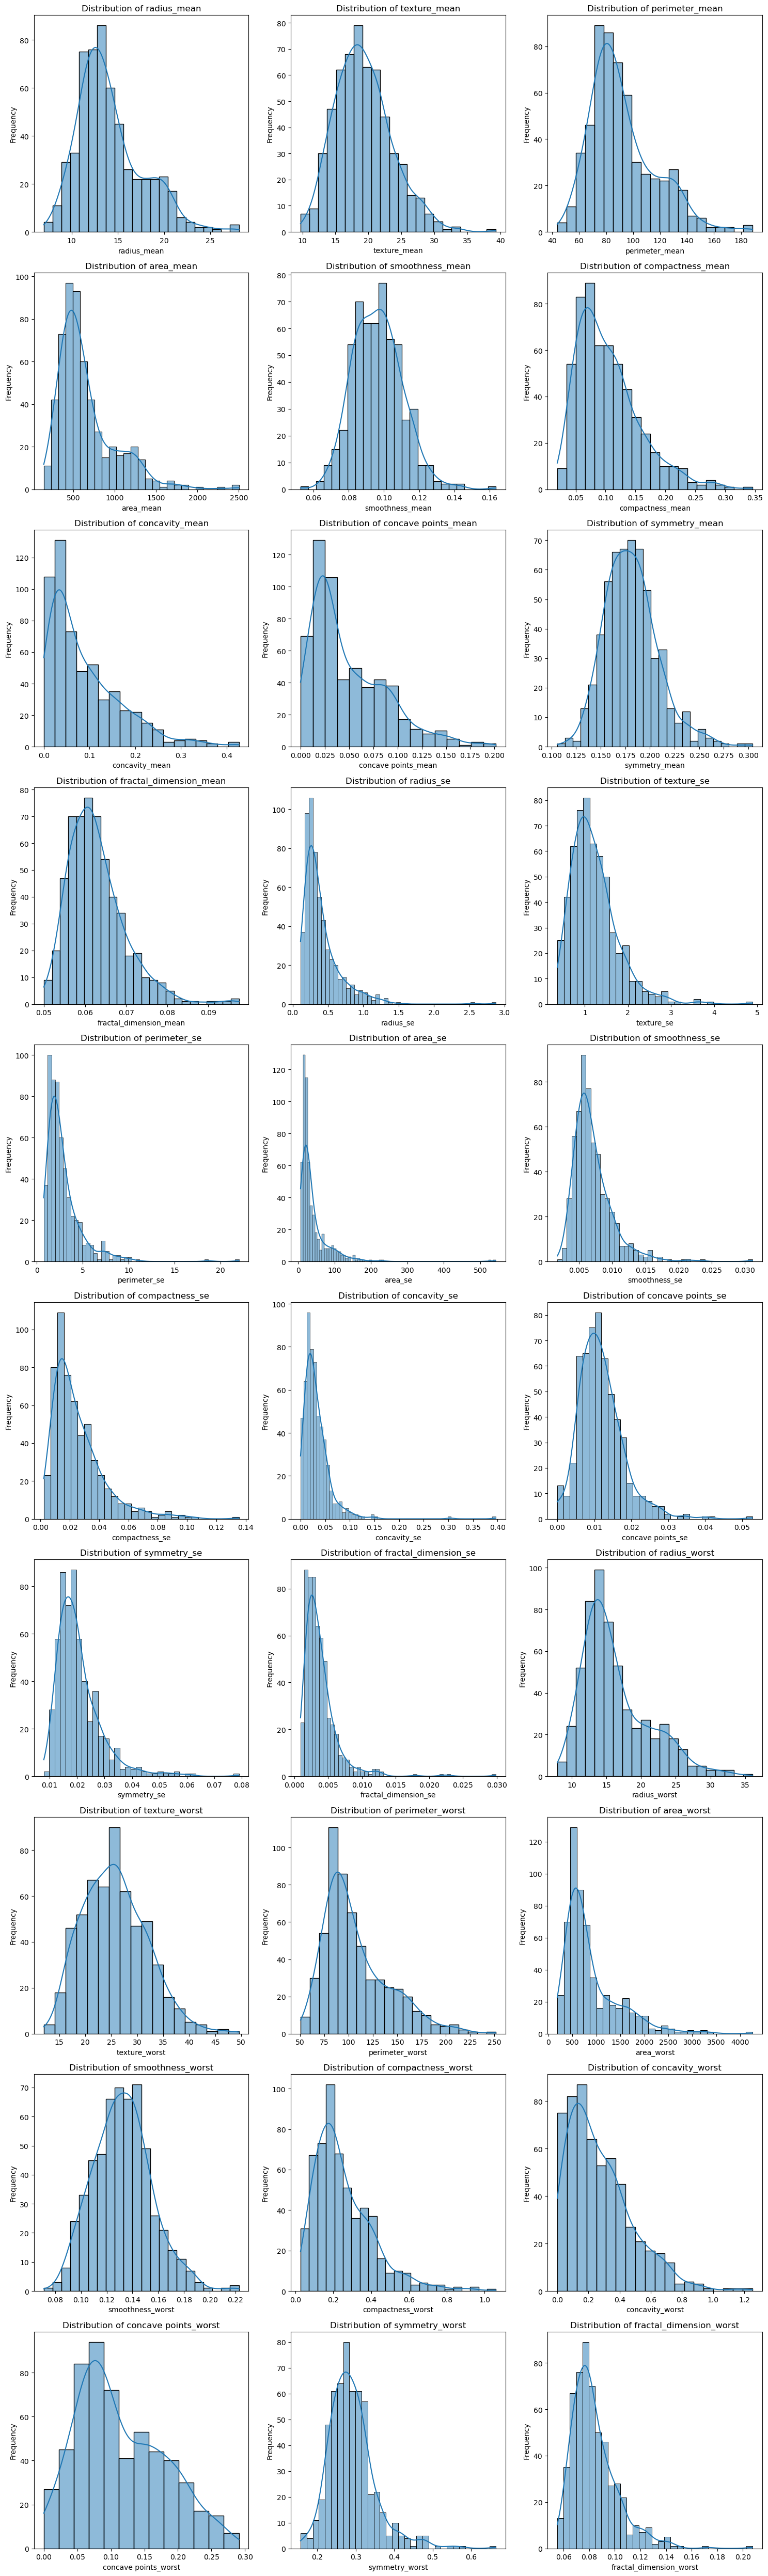

In [4]:
# Plot histograms of numerical features to see each frequency
numerical_cols = df_new.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('id')
if 'Unnamed: 32' in numerical_cols:
    numerical_cols.remove('Unnamed: 32')

num_plots = len(numerical_cols)
rows = (num_plots // 3) + (1 if num_plots % 3 > 0 else 0)
cols = min(num_plots, 3)

plt.rcParams['figure.figsize'] = (15, 5 * rows)
fig, axes = plt.subplots(rows, cols, sharex=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy indexing

for i, col in enumerate(numerical_cols):
    sns.histplot(df_new[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

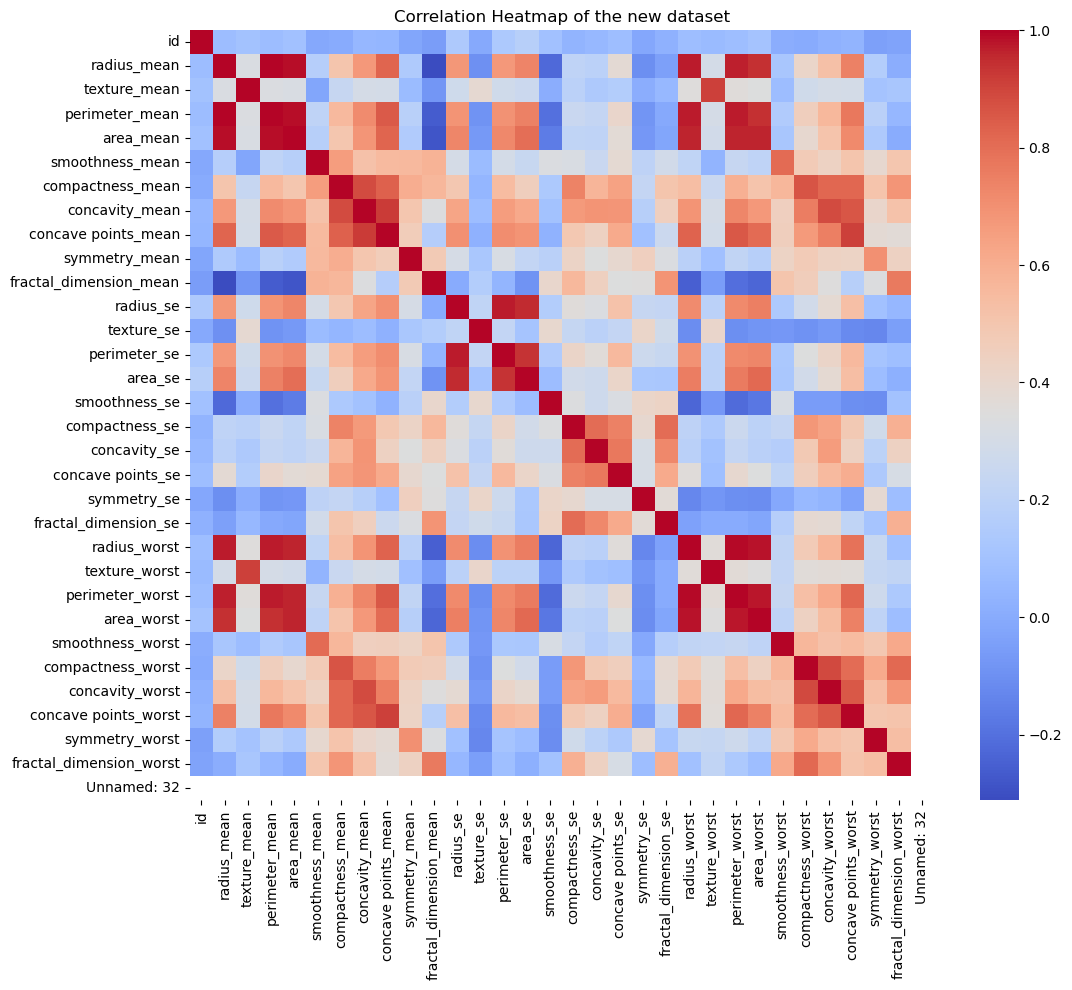


Correlation with the target variable (diagnosis):
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se  

In [5]:
#heatmap of the dataset
correlation_new = df_new.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap of the new dataset')
sns.heatmap(correlation_new, annot=False, cmap='coolwarm') # Removed annot=True for better readability if many features
plt.show()

# Correlation with the target variable (after converting to numerical)
diagnosis_numerical_corr = df_new['diagnosis'].map({'M': 1, 'B': 0})
correlation_with_diagnosis = df_new[numerical_cols].corrwith(diagnosis_numerical_corr).sort_values(ascending=False)
print("\nCorrelation with the target variable (diagnosis):")
print(correlation_with_diagnosis)

In [6]:
# 9. Declare feature vector and target variable
X_new = df_new.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y_new = df_new['diagnosis']

# Convert target variable to numerical
y_new = y_new.map({'M': 1, 'B': 0}) # Malignant: 1, Benign: 0

# 10. Split data into separate training and test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

print("\nShape of X_train_new:", X_train_new.shape)
print("Shape of X_test_new:", X_test_new.shape)
print("Shape of y_train_new:", y_train_new.shape)
print("Shape of y_test_new:", y_test_new.shape)


Shape of X_train_new: (455, 30)
Shape of X_test_new: (114, 30)
Shape of y_train_new: (455,)
Shape of y_test_new: (114,)


In [7]:
# 12. Feature Scaling
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

X_train_scaled_df_new = pd.DataFrame(X_train_scaled_new, columns=X_train_new.columns)
X_test_scaled_df_new = pd.DataFrame(X_test_scaled_new, columns=X_test_new.columns)

print("\nFirst 5 rows of scaled X_train_new:")
print(X_train_scaled_df_new.head())
print("\nFirst 5 rows of scaled X_test_new:")
print(X_test_scaled_df_new.head())


First 5 rows of scaled X_train_new:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -1.150365     -0.390642       -1.128550  -0.958764         0.310984   
1    -0.937990      0.680514       -0.948201  -0.821525        -0.609636   
2     0.574121     -1.033336        0.513941   0.408586        -0.106161   
3    -0.547220     -0.316022       -0.577622  -0.566615         0.586662   
4    -0.527398      0.791240       -0.561563  -0.523571        -1.051446   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.595995       -0.802596            -0.802490       0.294539   
1         -0.909867       -0.660669            -0.898716       0.754935   
2         -0.363019       -0.417990            -0.088446      -0.271820   
3         -0.649331       -0.805298            -0.500065       0.331078   
4         -1.017532       -0.905149            -0.935806      -0.969721   

   fractal_dimension_mean  ...  radius_worst  texture_w

In [8]:
# 13. Fit K Neighbours Classifier to the training set
knn_new = KNeighborsClassifier(n_neighbors=5) # Let's start with k=5
knn_new.fit(X_train_scaled_df_new, y_train_new)

KNeighborsClassifier()

In [9]:
# 14. Predict test-set results
y_pred_new = knn_new.predict(X_test_scaled_df_new)
print("\nFirst 10 predictions on the new test set:")
print(y_pred_new[:10])
print("\nFirst 10 true labels of the new test set:")
print(y_test_new[:10].values)


First 10 predictions on the new test set:
[1 0 0 0 0 0 0 0 0 0]

First 10 true labels of the new test set:
[1 0 0 0 0 0 0 0 0 0]


In [10]:
# 15. Check accuracy score
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print('\nModel accuracy score (new dataset): {0:0.4f}'.format(accuracy_new))

# Compare the train-set and test-set accuracy
y_pred_train_new = knn_new.predict(X_train_scaled_df_new)
print('Training-set accuracy score (new dataset): {0:0.4f}'.format(accuracy_score(y_train_new, y_pred_train_new)))
print('Test-set accuracy score (new dataset): {0:0.4f}'.format(knn_new.score(X_test_scaled_df_new, y_test_new)))

# Check class distribution in test set for null accuracy
print("\nClass distribution in the new test set:")
print(y_test_new.value_counts())
null_accuracy_new = y_test_new.value_counts().max() / len(y_test_new)
print('Null accuracy score (new dataset): {0:0.4f}'.format(null_accuracy_new))


Model accuracy score (new dataset): 0.9561
Training-set accuracy score (new dataset): 0.9780
Test-set accuracy score (new dataset): 0.9561

Class distribution in the new test set:
diagnosis
0    67
1    47
Name: count, dtype: int64
Null accuracy score (new dataset): 0.5877



Confusion matrix (new dataset):

 [[67  0]
 [ 5 42]]

True Positives (TP) =  42

True Negatives (TN) =  67

False Positives (FP) =  0

False Negatives (FN) =  5


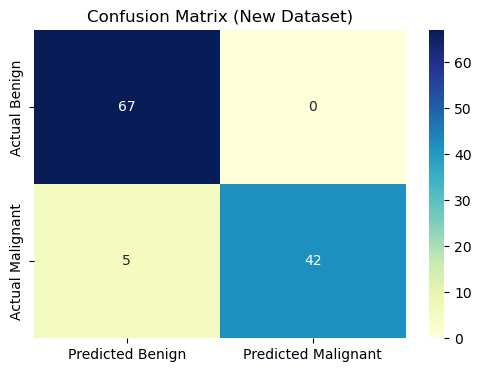

In [11]:
# 16. Confusion matrix
cm_new = confusion_matrix(y_test_new, y_pred_new)
print('\nConfusion matrix (new dataset):\n\n', cm_new)
print('\nTrue Positives (TP) = ', cm_new[1, 1])
print('\nTrue Negatives (TN) = ', cm_new[0, 0])
print('\nFalse Positives (FP) = ', cm_new[0, 1])
print('\nFalse Negatives (FN) = ', cm_new[1, 0])

plt.figure(figsize=(6, 4))
cm_matrix_new = pd.DataFrame(data=cm_new, columns=['Predicted Benign', 'Predicted Malignant'],
                                 index=['Actual Benign', 'Actual Malignant'])
sns.heatmap(cm_matrix_new, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix (New Dataset)')
plt.show()

In [12]:
# 17. Classification metrics
print('\nClassification Report (new dataset):')
print(classification_report(y_test_new, y_pred_new))

TP_new = cm_new[1, 1]
TN_new = cm_new[0, 0]
FP_new = cm_new[0, 1]
FN_new = cm_new[1, 0]

classification_accuracy_new = (TP_new + TN_new) / float(TP_new + TN_new + FP_new + FN_new)
print('Classification accuracy (new dataset): {0:0.4f}'.format(classification_accuracy_new))
classification_error_new = (FP_new + FN_new) / float(TP_new + TN_new + FP_new + FN_new)
print('Classification error (new dataset): {0:0.4f}'.format(classification_error_new))
precision_new = TP_new / float(TP_new + FP_new)
print('Precision (new dataset): {0:0.4f}'.format(precision_new))
recall_new = TP_new / float(TP_new + FN_new)
print('Recall (new dataset): {0:0.4f}'.format(recall_new))
specificity_new = TN_new / (TN_new + FP_new)
print('Specificity (new dataset): {0:0.4f}'.format(specificity_new))

# Rebuild kNN Classification model using different values of k
print("\nRebuilding kNN model with different k values (new dataset):")
for k in [3, 5, 7, 9]:
    knn_k_new = KNeighborsClassifier(n_neighbors=k)
    knn_k_new.fit(X_train_scaled_df_new, y_train_new)
    y_pred_k_new = knn_k_new.predict(X_test_scaled_df_new)
    accuracy_k_new = accuracy_score(y_test_new, y_pred_k_new)
    print(f'Model accuracy score with k={k} (new dataset): {accuracy_k_new:.4f}')


Classification Report (new dataset):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification accuracy (new dataset): 0.9561
Classification error (new dataset): 0.0439
Precision (new dataset): 1.0000
Recall (new dataset): 0.8936
Specificity (new dataset): 1.0000

Rebuilding kNN model with different k values (new dataset):
Model accuracy score with k=3 (new dataset): 0.9561
Model accuracy score with k=5 (new dataset): 0.9561
Model accuracy score with k=7 (new dataset): 0.9561
Model accuracy score with k=9 (new dataset): 0.9474
